In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
url = 'https://www.pagina12.com.ar/'
p12 = requests.get(url)

In [3]:
p12.status_code

200

In [4]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta proper

In [5]:
p12.request.headers

{'User-Agent': 'python-requests/2.25.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Ver método

In [6]:
p12.request.method

'GET'

In [7]:
p12.request.url

'https://www.pagina12.com.ar/'

In [8]:
s = BeautifulSoup(p12.text, 'lxml')

In [9]:
type(s)

bs4.BeautifulSoup

In [10]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

In [11]:
secciones = s.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

In [12]:
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [13]:
seccion = secciones[0]

In [14]:
seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [15]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [16]:
links_secciones = [sec.a.get('href') for sec in secciones]

In [17]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

In [18]:
#Elimino conflicto

In [19]:
links_secciones.pop(3)

'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos'

In [20]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/contratapa']

## Obteniendo listado de notas

Probemos con una sección cualquiera

In [21]:
sec = requests.get(links_secciones[0])
sec.status_code

200

In [22]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [23]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo

Vemos que hay un *featured article* principal y después una lista de artículos dentro de un tag `<ul>` con el resto de las notas.
#### Extrayendo el *featured article*

In [24]:
featured_article = s_seccion.find('div', attrs={'class':'article-item__content'})

In [25]:
featured_article

<div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/313806-testigos-de-los-vuelos-de-la-muerte-ahi-llevaban-fiambres-pa">Testigos de los vuelos de la muerte: "Ahí llevaban 'fiambres' para tirarlos al mar"</a></h2><!-- Kicker --><p><a href="https://www.pagina12.com.ar/313806-testigos-de-los-vuelos-de-la-muerte-ahi-llevaban-fiambres-pa">Declaración clave de los exconscriptos ante la Justicia</a></p></div>

In [26]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/313806-testigos-de-los-vuelos-de-la-muerte-ahi-llevaban-fiambres-pa'

#### Extrayendo el resto de las notas

In [27]:
def obtener_links(soup):
    ''' 
    Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    featured_article = soup.find('div', attrs={'class':'article-item__content'})
    link_nota_featured = featured_article.a.get('href')
    
    notas = soup.find_all('h4',attrs={'class':'title-list'})
    link_notas = [nota.a.get('href') for nota in notas]
    
    lista_links = [link_nota_featured]+link_notas
    
    return lista_links

In [28]:
obtener_links(s_seccion)

['https://www.pagina12.com.ar/313806-testigos-de-los-vuelos-de-la-muerte-ahi-llevaban-fiambres-pa',
 'https://www.pagina12.com.ar/313758-coronavirus-en-argentina-se-registraron-79-muertes-y-3-713-n',
 'https://www.pagina12.com.ar/313777-legalizacion-del-aborto-al-recinto-sin-modificaciones-y-con-',
 'https://www.pagina12.com.ar/313779-quienes-son-los-jueces-que-autorizaron-la-restriccion-de-vac',
 'https://www.pagina12.com.ar/313786-hacia-una-nueva-movilidad-previsional',
 'https://www.pagina12.com.ar/313795-la-corte-suprema-y-una-sentencia-a-favor-de-dos-civiles-comp',
 'https://www.pagina12.com.ar/313797-el-comienzo-de-un-verano-decisivo',
 'https://www.pagina12.com.ar/313805-brexit-la-union-europea-excluyo-a-las-islas-malvinas-del-acu',
 'https://www.pagina12.com.ar/313754-alberto-fernandez-se-reunio-con-los-gobernadores-para-defini']

#### Extrayendo el título de las notas

In [29]:
def obtener_notas(soup):
    notas = soup.find_all('h4',attrs={'class':'title-list'})
    link_notas = [nota.a.get('href') for nota in notas]
    descriptions = [l.a.get_text() for l in notas]
    
    return descriptions


In [30]:
obtener_notas(s_seccion)

['Coronavirus en Argentina: se registraron\xa079\xa0 muertes y 3.713 nuevos casos',
 'Legalización del aborto: al recinto sin modificaciones y con ventaja verde',
 '¿Quiénes son los jueces que autorizaron la restricción de vacantes en las escuelas públicas porteñas? ',
 'Hacia una nueva movilidad previsional',
 'La Corte Suprema y una sentencia a favor de dos civiles cómplices del terror',
 'El comienzo de un verano decisivo',
 'Brexit: la Unión Europea excluyó a las Islas Malvinas del acuerdo con el Reino Unido',
 'Alberto Fernández se reunió con los gobernadores para definir el plan de vacunación']

# Una sola función

Ahora metamos todo el proceso en una función

In [31]:
def scrap_section_page(url):
    '''
    Función que recibe la url de una sección del diario y devuelve una lista con los links a las notas
    '''
    
    # Obtenemos la página
    try:
        r = requests.get(url)
    except Exception as e:
        print('Error obteniendo la página. Excepción ',e)
        return np.nan
    
    if r.status_code != 200:
        print('Error obteniendo la página. Status Code', r.status_code)
        return np.nan
    
    # Generamos una lista vacía para ir poblándola con las notas
    lista_notas = []
    
    # Parseamos el HTML de la página
    s = BeautifulSoup(r.text, 'lxml')
    
    # Obtenemos la noticia promocionada
    featured_article = s.find('div', attrs={'class':'article-item__content'})
    if featured_article is not None:
        try:
            lista_notas.append(featured_article.a.get('href'))
        except:
            pass
    
    # Obtenemos la lista de noticias
    article_list = s.find('h4',attrs={'class':'title-list'})
    # Obtenemos los items de la lista
    items = article_list.find_all('li')
    # Extraemos los links de los items que no están vacíos
    for li in items:
        if li.a is not None:
            lista_notas.append(li.a.get('href'))
    
    return lista_notas

Probemos la función

In [32]:
scrap_section_page(links_secciones[0])

['https://www.pagina12.com.ar/313806-testigos-de-los-vuelos-de-la-muerte-ahi-llevaban-fiambres-pa']

Para extraer varias páginas de la misma sección:

In [33]:
notas = []
for link in links_secciones:
    for pagina in range(5):
        url = link+f'?page={pagina}'
        print(f'Obteniendo links de {url}')
        notas += scrap_section_page(url)

Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=2
Obteniendo links de https://www.pagina12.co

In [34]:
len(notas)

30

Eliminamos notas duplicadas

In [35]:
notas = set(notas)

In [36]:
len(notas)

30

In [37]:
np.random.choice(list(notas),10)

array(['https://www.pagina12.com.ar/313796-europa-enfrenta-el-rebrote-de-coronavirus-con-una-estrategia',
       'https://www.pagina12.com.ar/303595-toque-de-queda',
       'https://www.pagina12.com.ar/313414-partido-pendiente-defensa-se-impuso-por-2-1-ante-estudiantes',
       'https://www.pagina12.com.ar/305505-el-codigo-de-osvaldo',
       'https://www.pagina12.com.ar/313325-vicentin-solicitan-el-apartamiento-del-juez-lorenzini',
       'https://www.pagina12.com.ar/312809-coronavirus-ciudad-de-mexico-cierra-todas-las-actividades-no',
       'https://www.pagina12.com.ar/313621-estados-unidos-una-explosion-sacudio-nashville',
       'https://www.pagina12.com.ar/311520-otra-mirada-sobre-cesar-tiempo',
       'https://www.pagina12.com.ar/313288-el-mejor-torneo-de-surf-del-pais-corono-al-campeon-argentino',
       'https://www.pagina12.com.ar/313288-el-mejor-torneo-de-surf-del-pais-corono-al-campeon-argentino'],
      dtype='<U95')

## Scraping de una nota

In [38]:
nota = requests.get('https://www.pagina12.com.ar/313718-beccacece-anuncio-su-salida-de-racing')
nota.status_code

200

In [39]:
s_nota = BeautifulSoup(nota.text, 'lxml')
print(s_nota.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Beccacece anunció su salida de Racing | Tras quedar...  | Página12
  </title>
  <link href="https://www.pagina12.com.ar/313718-beccacece-anuncio-su-salida-de-racing" rel="canonical"/>
  <link href="https://www.pagina12.com.ar/313718-beccacece-anuncio-su-salida-de-racing?amp=1" rel="amphtml"/>
  <script async="" src="https://news.google.com/swg/js/v1/swg.js">
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://sc

### Extrayendo la fecha

La fecha de la nota se encuentra en un tag *span* con el atributo **pubdate="pubdate"**

In [40]:
s_nota.find('span', attrs={'pubdate':'pubdate'})

<span datetime="2020-12-27" pubdate="pubdate">27 de diciembre de 2020</span>

Para extraer la fecha, la podemos sacar del atributo **datetime**

In [41]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')

'2020-12-27'

O del texto del tag

In [42]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get_text()

'27 de diciembre de 2020'

### Extrayendo el título

El título de las notas suele estar recortado en la URL, por eso es conveniente sacarlo de la nota en sí.

In [43]:
s_nota.find('h1', attrs={'class':'article-title'})

<h1 class="article-title">Beccacece anunció su salida de Racing</h1>

In [44]:
s_nota.find('h1', attrs={'class':'article-title'}).get_text()

'Beccacece anunció su salida de Racing'

### Extrayendo la volanta

In [45]:
s_nota.find('h2', attrs={'class':'article-prefix'})

<h2 class="article-prefix">Tras quedar fuera de la Libertadores, dará un paso al costado</h2>

In [46]:
s_nota.find('h2', attrs={'class':'article-prefix'}).get_text()

'Tras quedar fuera de la Libertadores, dará un paso al costado'

### Extrayendo el copete

In [47]:
s_nota.find('div', attrs={'class':'article-summary'})

<div class="article-summary">Su contrato vencía el 30 de junio de 2021, pero dejará el club cuando termine la Copa Diego Maradona; este domingo enfrenta desde las 17.10 a Godoy Cruz.</div>

In [48]:
s_nota.find('div', attrs={'class':'article-summary'}).get_text()

'Su contrato vencía el 30 de junio de 2021, pero dejará el club cuando termine la Copa Diego Maradona; este domingo enfrenta desde las 17.10 a Godoy Cruz.'

### Extrayendo el texto de la nota

In [49]:
texto_nota = s_nota.find('div', attrs={'class':'article-text'})
texto_nota

<div class="article-text"><p><b>El entrenador Sebastián Beccacece anunció este mediodía que dejará su cargo en Racing</b> a pesar de que su contrato vencía el 30 de junio de 2021. La salida del club de Avellaneda se consumará cuando termine la participación del equipo en la Copa Diego Maradona.</p><p><b>El entrenador habló en conferencia de prensa en la víspera del partido con Godoy Cruz. </b>Contó a la prensa que informó de su decisión al plantel y al presidente del club, Víctor Blanco. "(Diego) Milito anunció su salida y es momento de que yo lo haga", manifestó el DT en relación al manager, que también dejó su cargo.</p><p>Diego Milito había propiciado la llegada de Beccacece al club a fines del año pasado, justo después de haber dejado Independiente, el histórico rival de Racing. "Tengo el deseo de continuar en este espacio tan cómodo, pero como todos saben Diego nos anunció que se va y voy a seguir ese mismo camino", se justificó. "<b>Me hubiera encantado seguir. A veces hay que gu

Tenemos 2 tags indeseados:
- un 'div' con contenido embebido
- un 'a' con una referencia al mail del autor

In [50]:
def scrap_texto(texto_nota):
    
    texto=None
    try:
        texto_nota.find('div').decompose()
    except:
        pass
    try:
        texto_nota.find('a', attrs={'class':"__cf_email__"}).decompose()
    except:
        pass
    try:
        texto = texto_nota.get_text()
    except:
        pass
    
    return texto

In [51]:
scrap_texto(texto_nota)

'El entrenador Sebastián Beccacece anunció este mediodía que dejará su cargo en Racing a pesar de que su contrato vencía el 30 de junio de 2021. La salida del club de Avellaneda se consumará cuando termine la participación del equipo en la Copa Diego Maradona.El entrenador habló en conferencia de prensa en la víspera del partido con Godoy Cruz. Contó a la prensa que informó de su decisión al plantel y al presidente del club, Víctor Blanco. "(Diego) Milito anunció su salida y es momento de que yo lo haga", manifestó el DT en relación al manager, que también dejó su cargo.Diego Milito había propiciado la llegada de Beccacece al club a fines del año pasado, justo después de haber dejado Independiente, el histórico rival de Racing.\xa0"Tengo el deseo de continuar en este espacio tan cómodo, pero como todos saben Diego nos anunció que se va y voy a seguir ese mismo camino", se justificó. "Me hubiera encantado seguir. A veces hay que guiarse más por el deseo que la razón, pero no es mi caso"

### Extrayendo el autor

In [52]:
s_nota.find('div', attrs={'class':'article-author'})

<div class="article-author"><strong><span>Por </span><a href="https://www.pagina12.com.ar/autores/9709-andrea-guzman">Andrea Guzmán</a></strong></div>

En este caso el nombre del autor se encuentra dentro del tag 'a' con referencia a su propia página

In [53]:
s_nota.find('div', attrs={'class':'article-author'}).a.get_text()

'Andrea Guzmán'

### Extrayendo la sección

In [54]:
s_nota.find('div', attrs={'class':'suplement'})

<div class="suplement"><a href="https://www.pagina12.com.ar/secciones/deportes/notas">Deportes</a></div>

In [55]:
s_nota.find('div', attrs={'class':'suplement'}).get_text()

'Deportes'

### Extrayendo la imagen principal

In [56]:
s_nota.find('div', attrs={'class':'article-main-media-image'})

<div class="article-main-media-image"><div class="article-main-media-image__container object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=9YaitxDp" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/12

Extraemos la imagen

In [57]:
s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')

[<img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=9YaitxDp" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Beccacece dando indicaciones ante Flamengo, por la Libertadores. " class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Beccacece da

Hay más de una imágen! veamos las diferencias

In [58]:
[img.get('data-src') for img in s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')]

['https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=9YaitxDp',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV']

Intentemos quedarnos con la imagen de mayor tamaño

In [59]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})
imagenes = media.find_all('img')
if len(imagenes) == 0:
    print('no se encontraron imágenes')
elif len(imagenes) == 1:
    # Hay un único link
    imagen = imagenes[0]
    img = imagen.get('data-src')
else:
    imagen = media.find('img',attrs={'class':'show-for-xlarge'})
    if imagen is None:
        imagen = media.find('img',attrs={'class':'show-for-large'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-medium'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-small'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                    if imagen is None:
                        print('No se pudo recuprerar imagen')
    if imagen is not None:
        img =  imagen.get('data-src')
img    

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-12/129598-1606871167201201666-20-281-29.jpg?itok=82uOM8JV'

Obtenemos la imagen

In [60]:
img_data = requests.get(img)

### Importamos librería de Python

In [61]:
from IPython.display import Image

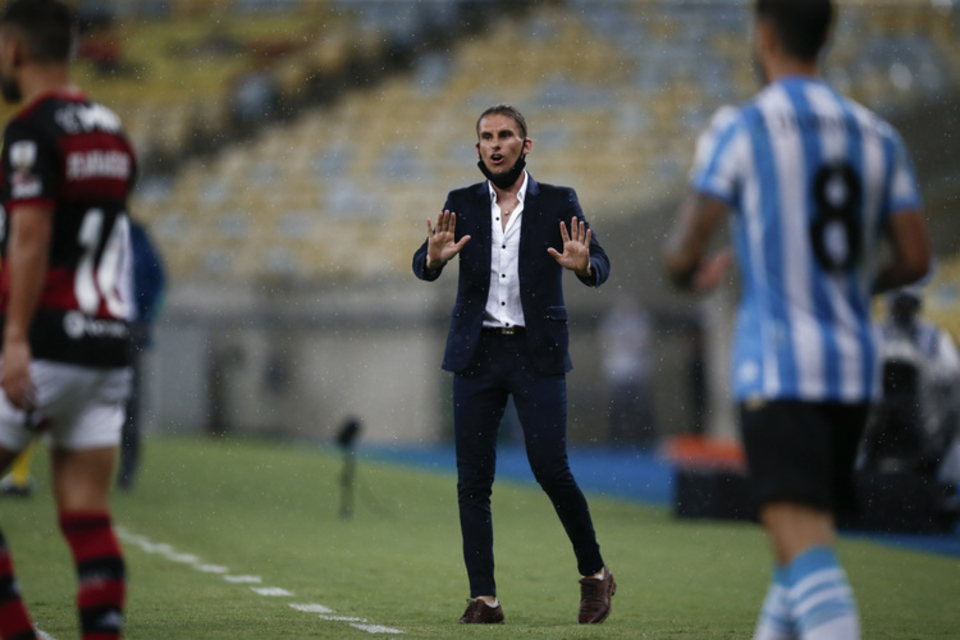

In [62]:
Image(img_data.content)

In [63]:
def extraer_imagen(soup_nota):
    #soup_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')
    media = soup_nota.find('div', attrs={'class':'article-main-media-image'})
    if media is None:
        print('Nota sin imagen')
        return np.nan
    imagenes = media.find_all('img')
    if len(imagenes) == 0:
        print('no se encontraron imágenes')
    elif len(imagenes) == 1:
        # Hay un único link
        imagen = imagenes[0]
        img = imagen.get('data-src')
    else:
        imagen = media.find('img',attrs={'class':'show-for-xlarge'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-large'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-medium'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-small'})
                    if imagen is None:
                        imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                        if imagen is None:
                            print('No se pudo recuprerar imagen')
        if imagen is not None:
            img =  imagen.get('data-src')
    try:
        img_data = requests.get(img)
    except Exception as e:
        print('Error obteniendo imagen, con error', e)
    if img_data.status_code == 200:
        return img_data.content
    else:
        print('Error obteniendo imagen, con status code: ', img_data.status_code)
        return np.nan
    

# Scrap completo de la nota

In [64]:
import numpy as np

In [65]:
def scrap_nota(url):
    '''
    Función que recibe la URL de una nota y devuelve un diccionario con la información de la misma
    '''
    # Hago la request a la url de la nota
    nota = requests.get(url)
    # Verifico si hubo error
    if nota.status_code != 200:
        print('Error obteniendo nota. Status code: {}'.format(nota.status_code))
        return np.nan
    
    # Preparo el diccionario para el retorno
    ret_dict = {'url':url}
    
    # Parseo el contenido
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    # Extraigo la fecha
    try:
        ret_dict['fecha'] = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    except:
        ret_dict['fecha'] = np.nan
    
    # Extraigo el titulo
    try:
        ret_dict['titulo'] = s_nota.find('h1', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['titulo'] = np.nan
    
    # Extraigo la volanta
    try:
        ret_dict['volanta'] = s_nota.find('h2', attrs={'class':'article-prefix'}).get_text()
    except:
        ret_dict['volanta'] = np.nan
    
    # Extraigo el copete
    try:
        ret_dict['copete'] = s_nota.find('div', attrs={'class':'article-summary'}).get_text()
    except:
        ret_dict['copete'] = np.nan
    
    # Extraigo el texto
    try:
        texto_nota = s_nota.find('div', attrs={'class':'article-text'})
        ret_dict['texto'] = scrap_texto(texto_nota)
    except:
        ret_dict['texto'] = np.nan
        
    # Extraigo el autor
    try:
        ret_dict['autor'] = s_nota.find('div', attrs={'class':'article-author'}).a.get_text()
    except:
        ret_dict['autor'] = np.nan
    
    # Extraigo la seccion
    try:
        ret_dict['seccion'] = s_nota.find('div', attrs={'class':'suplement'}).get_text()
    except:
        ret_dict['seccion'] = np.nan
    
    # Extraigo la imagen
    ret_dict['imagen'] = extraer_imagen(s_nota)
    
    return ret_dict
    
        

Beccacece anunció su salida de Racing


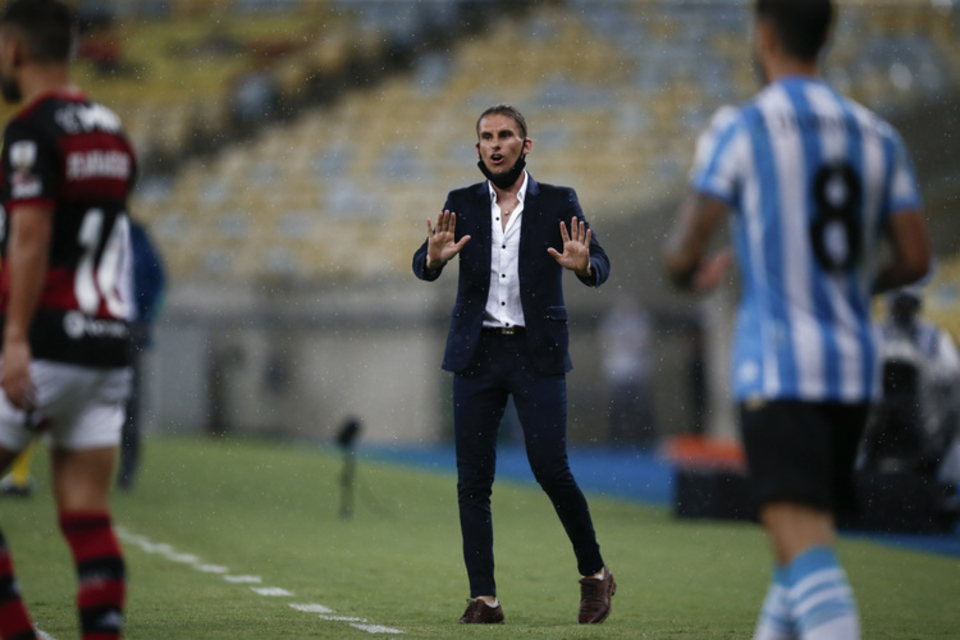

In [66]:
info_nota = scrap_nota('https://www.pagina12.com.ar/313718-beccacece-anuncio-su-salida-de-racing')
print(info_nota['titulo'])
Image(info_nota['imagen'])

Tenemos una función que a partir de la URL de un artículo, extrae toda la información deseada. Ahora armemos una lista de urls a escrapear:

In [67]:
data = []
for i,url in enumerate(notas):
    print(f'Scraping nota {i+1}/{len(notas)}...')
    data.append(scrap_nota(url))

Scraping nota 1/30...
Scraping nota 2/30...
Scraping nota 3/30...
Scraping nota 4/30...
Scraping nota 5/30...
Scraping nota 6/30...
Scraping nota 7/30...
Scraping nota 8/30...
Scraping nota 9/30...
Scraping nota 10/30...
Scraping nota 11/30...
Scraping nota 12/30...
Scraping nota 13/30...
Scraping nota 14/30...
Scraping nota 15/30...
Scraping nota 16/30...
Scraping nota 17/30...
Scraping nota 18/30...
Scraping nota 19/30...
Scraping nota 20/30...
Scraping nota 21/30...
Scraping nota 22/30...
Scraping nota 23/30...
Scraping nota 24/30...
Scraping nota 25/30...
Scraping nota 26/30...
Scraping nota 27/30...
Scraping nota 28/30...
Scraping nota 29/30...
Scraping nota 30/30...


In [68]:
df = pd.DataFrame(data)
df.tail()

,url,fecha,titulo,volanta,copete,texto,autor,seccion,imagen
25,https://www.pagina12.com.ar/303595-toque-de-queda,2020-11-04,Toque de queda,Las nuevas normalidades de la pandemia,NaN,Toque de quena lo llamaban las clases blancas ...,Elina Malamud,Contratapa,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
26,https://www.pagina12.com.ar/313286-coronavirus...,2020-12-22,Coronavirus en Estados Unidos: se vacunó el ex...,El evento fue transmitido en vivo por televisión,NaN,"El inmunólogo Anthony Fauci, asesor del gobier...",Andrea Guzmán,El mundo,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
27,https://www.pagina12.com.ar/313397-noviembre-c...,2020-12-24,Noviembre con caída en el consumo eléctrico,Fundelec reportó una baja de la demanda intera...,Influyeron un menor uso industrial y comercial...,Un informe de la Fundación para el Desarrollo ...,Andrea Guzmán,Economía,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
28,https://www.pagina12.com.ar/312821-la-soja-tre...,2020-12-18,La soja trepó a su mayor valor desde 2014 en C...,Subió u$s 7 la tonelada en la jornada. Temor a...,NaN,El precio de la soja escaló este viernes casi ...,Andrea Guzmán,Economía,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
29,https://www.pagina12.com.ar/313718-beccacece-a...,2020-12-27,Beccacece anunció su salida de Racing,"Tras quedar fuera de la Libertadores, dará un ...","Su contrato vencía el 30 de junio de 2021, per...",El entrenador Sebastián Beccacece anunció este...,Andrea Guzmán,Deportes,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      30 non-null     object
 1   fecha    30 non-null     object
 2   titulo   30 non-null     object
 3   volanta  27 non-null     object
 4   copete   10 non-null     object
 5   texto    30 non-null     object
 6   autor    30 non-null     object
 7   seccion  30 non-null     object
 8   imagen   30 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB
